### Exploration of food consumption dynamics in Tajikistan in 2000-2018

##### Data source: https://www.stat.tj/ru/electronic-versions-of-publications

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df=pd.read_csv("migration_and_food_consumption.csv")
df.head()

,Year,Arrived,Departed,Meat and meat products,Milk and dairy,Eggs,Sugar and confectionery,Bread products,Potato,Vegetables and cucurbitaceous,"Fruit, berries, grapes",Salad oil
0,2000,14482.0,28188.0,4.4,64.9,19,6.7,148.0,37.8,98.5,50.8,10.2
1,2001,16729.0,29144.0,5.8,49.9,19,7.0,150.0,26.6,73.0,35.5,9.2
2,2002,17735.0,30219.0,6.5,51.2,24,8.4,157.0,28.3,82.1,36.7,10.4
3,2003,16923.0,27936.0,6.8,50.0,24,9.1,157.0,30.5,79.0,27.8,9.5
4,2004,15244.0,24663.0,7.3,48.2,24,10.0,155.0,35.3,76.7,45.0,11.4


In [3]:
df['Year']=pd.DatetimeIndex(pd.to_datetime(df['Year'], format='%Y')).year

In [4]:
df.dropna(inplace=True)
df.tail()

,Year,Arrived,Departed,Meat and meat products,Milk and dairy,Eggs,Sugar and confectionery,Bread products,Potato,Vegetables and cucurbitaceous,"Fruit, berries, grapes",Salad oil
14,2014,39648.0,45344.0,14.9,58.7,71,14.0,153.1,33.3,76.0,33.4,16.4
15,2015,35316.0,40135.0,14.6,57.5,72,13.7,150.0,35.8,80.0,35.9,15.7
16,2016,33336.0,37606.0,14.8,59.5,68,14.3,151.5,39.1,80.4,30.4,17.1
17,2017,37497.0,41150.0,14.0,58.1,76,15.9,161.4,42.4,89.0,33.3,16.7
18,2018,42082.0,45046.0,14.2,60.5,84,16.9,165.4,46.4,88.5,38.7,18.3


In [5]:
X=df.drop('Year', axis=1)

In [6]:
X.tail()

,Arrived,Departed,Meat and meat products,Milk and dairy,Eggs,Sugar and confectionery,Bread products,Potato,Vegetables and cucurbitaceous,"Fruit, berries, grapes",Salad oil
14,39648.0,45344.0,14.9,58.7,71,14.0,153.1,33.3,76.0,33.4,16.4
15,35316.0,40135.0,14.6,57.5,72,13.7,150.0,35.8,80.0,35.9,15.7
16,33336.0,37606.0,14.8,59.5,68,14.3,151.5,39.1,80.4,30.4,17.1
17,37497.0,41150.0,14.0,58.1,76,15.9,161.4,42.4,89.0,33.3,16.7
18,42082.0,45046.0,14.2,60.5,84,16.9,165.4,46.4,88.5,38.7,18.3


In [7]:
y = df['Year']

In [8]:
y.tail()

14    2014
15    2015
16    2016
17    2017
18    2018
Name: Year, dtype: int64

In [9]:
scaler = StandardScaler()

In [10]:
X = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=4)
pcs = pca.fit_transform(X)
new_X = pd.DataFrame(data=pcs, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [12]:
new_X.head()

,PC1,PC2,PC3,PC4
0,-2.502769,4.299633,-1.857233,0.580443
1,-3.705371,-1.519987,-1.247254,0.392323
2,-2.548762,-0.571612,-1.128487,-0.977535
3,-2.354059,-1.443144,-1.278787,-1.158668
4,-2.310475,-0.041640,0.638973,-0.361346


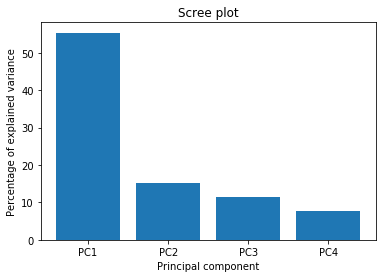

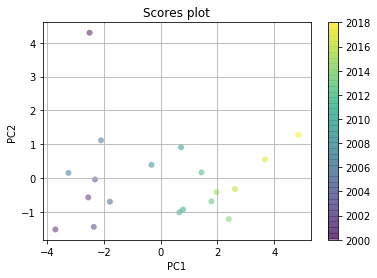

In [13]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()


plt.scatter(pcs[:,0], pcs[:,1], c=y, edgecolor='none', alpha=0.5)
plt.xlabel('PC1')#+per_var[0]
plt.ylabel('PC2')
plt.title('Scores plot')
plt.colorbar()
plt.grid()

In [22]:
print("\n First two principal components explain %d %% of data variance" % (per_var[0]+per_var[1]))


 First two principal components explain 70 % of data variance


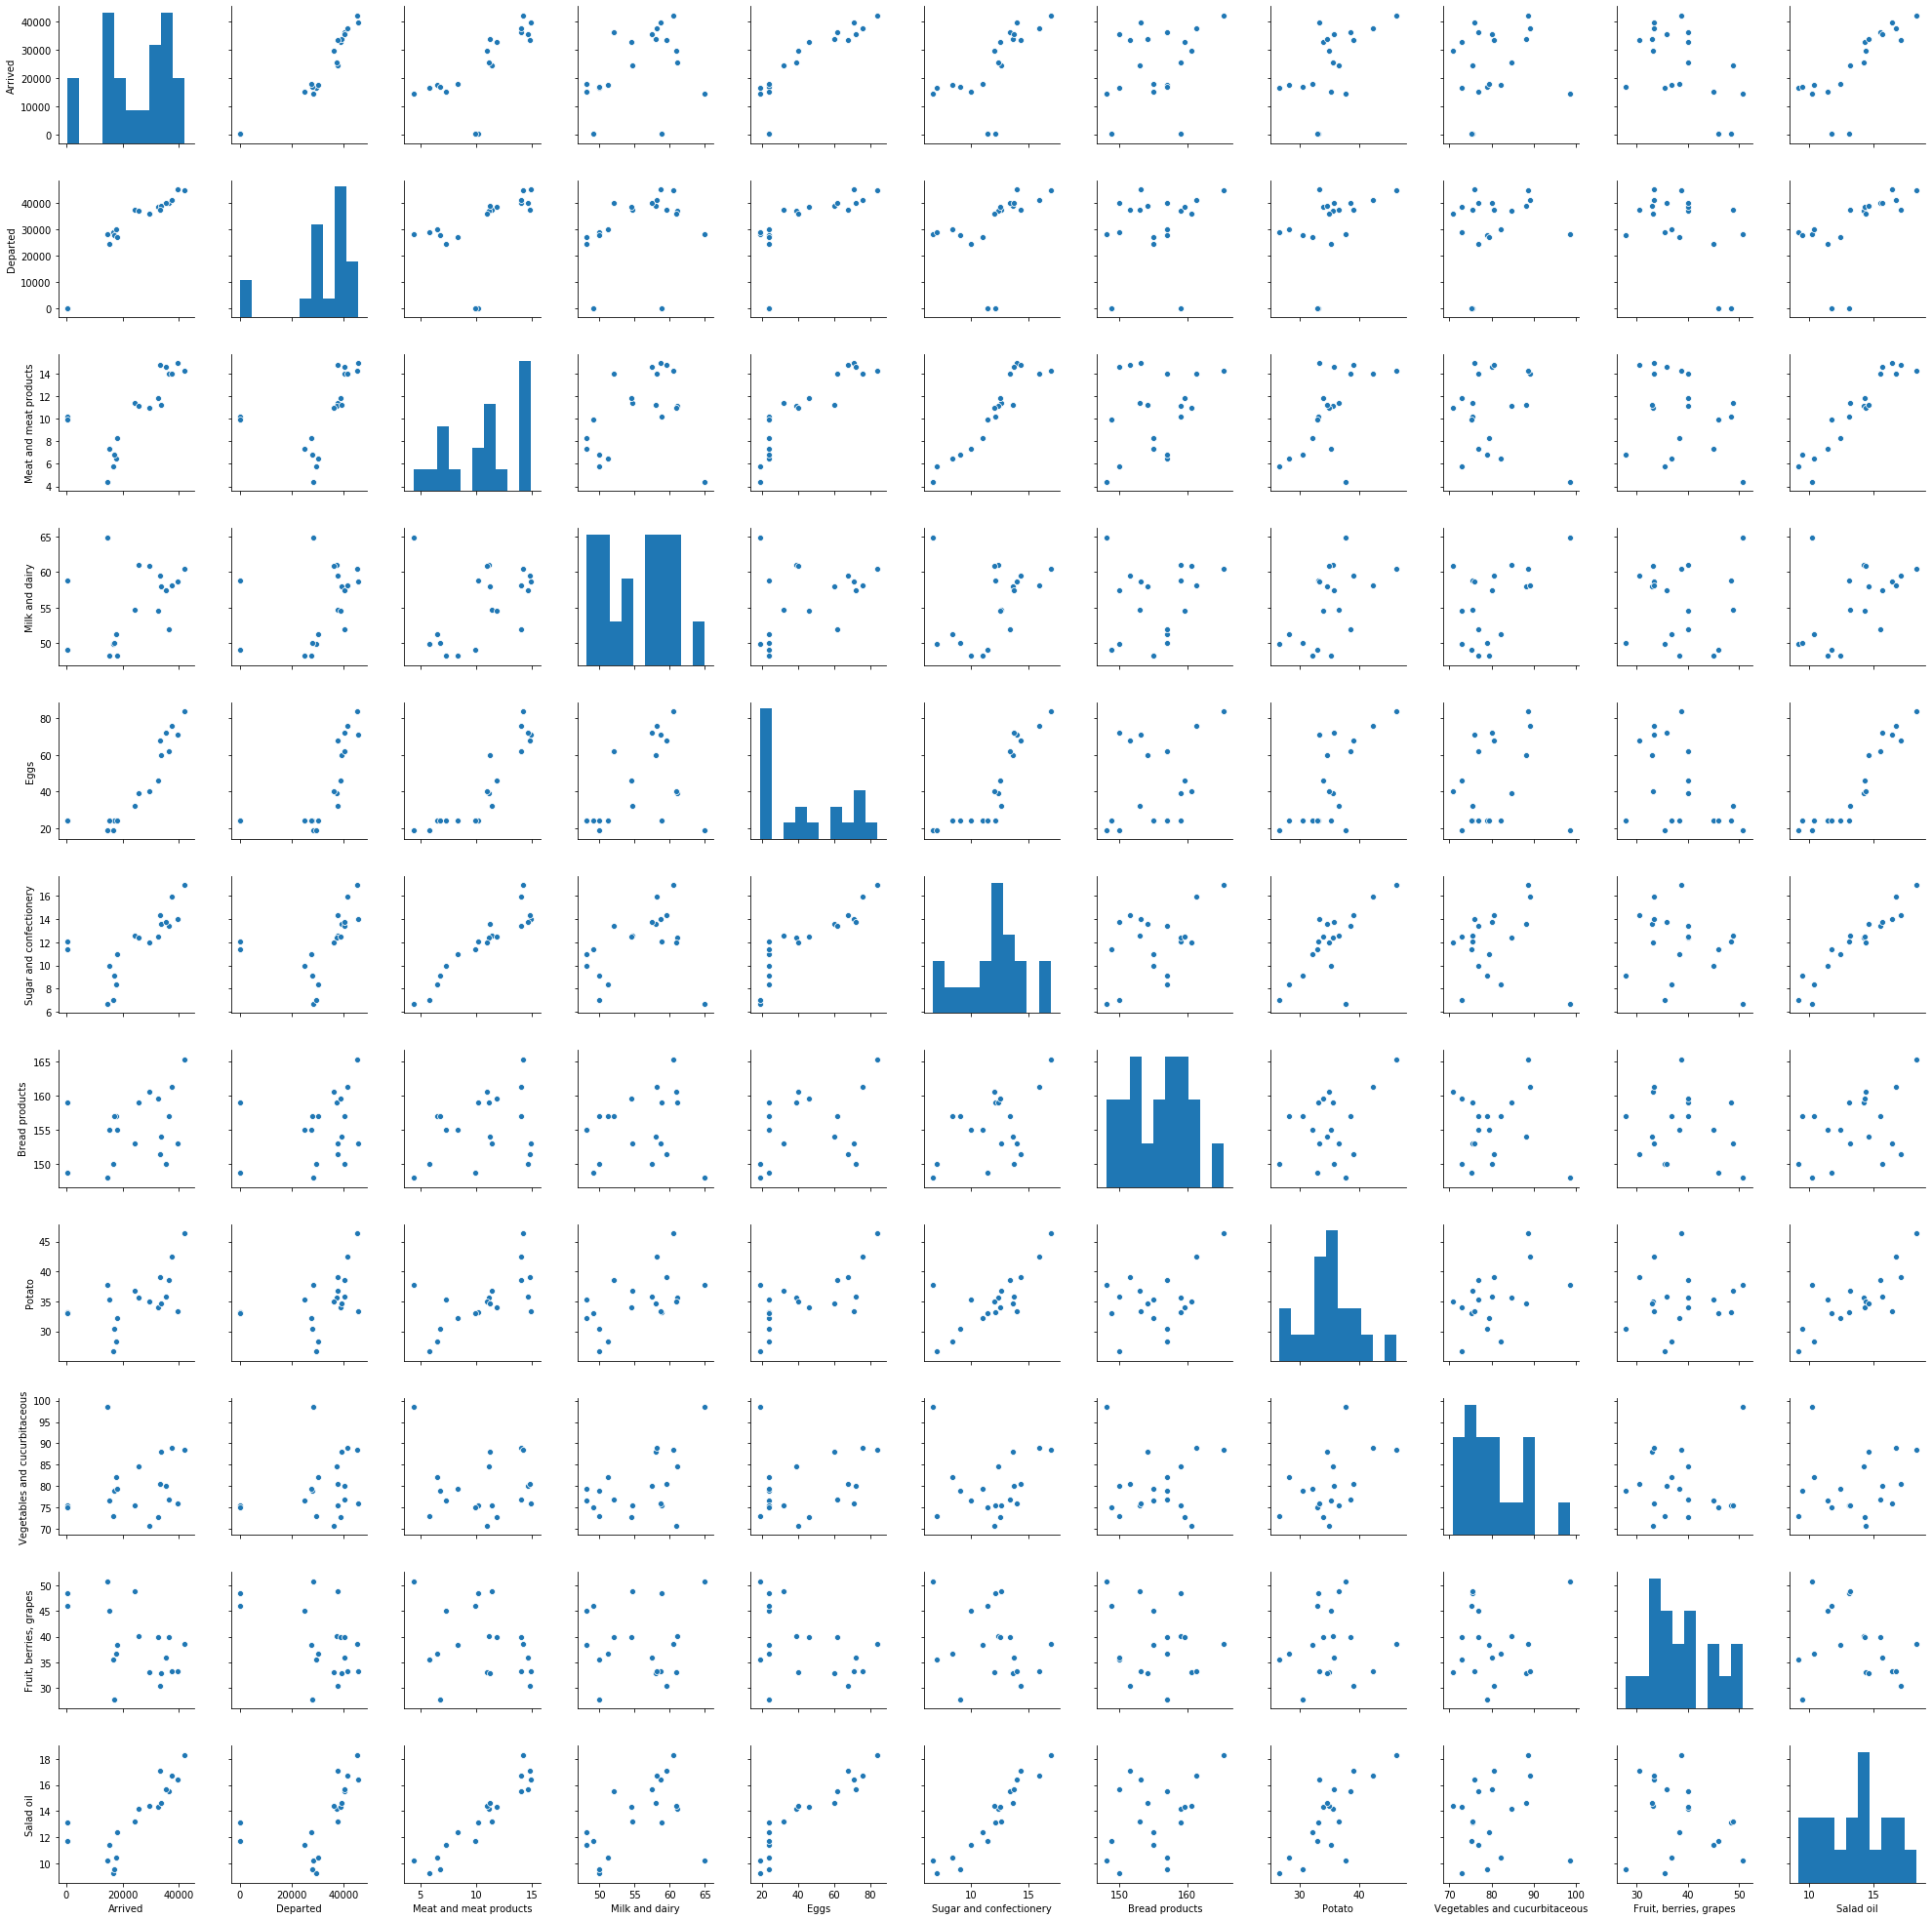

In [23]:
# Pairwise correlation of migration and food consumption data
compar=df.drop('Year', axis=1)
sns.pairplot(compar)


 There are two records that are apparent outliers. Are these typos? How accurate would be prediction of migration based on food consumption numbers?


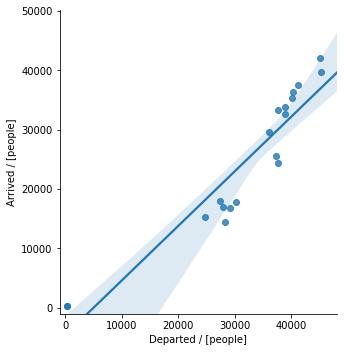

In [49]:
# Correlation plot: Departed vs arrived
sns.lmplot(x='Departed', y='Arrived', data=df)
plt.xlabel('Departed / [people]')
plt.ylabel('Arrived / [people]')
plt.xlim(left = -1000)
plt.ylim(bottom = -1000)

print("\n There are two records that are apparent outliers. Are these typos? How accurate would be prediction of migration based on food consumption numbers?")

(0, 53527.97441966491)

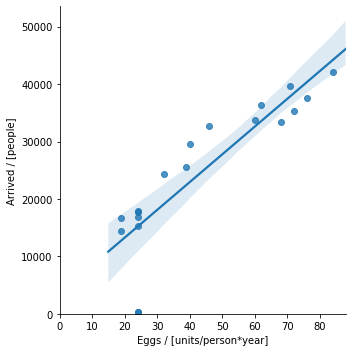

In [21]:
# Correlation plot: Eggs vs arrived
sns.lmplot(x='Eggs', y='Arrived', data=df)
plt.xlabel('Eggs / [units/person*year]')
plt.ylabel('Arrived / [people]')
plt.xlim(left=0)
plt.ylim(bottom=0)

([<matplotlib.axis.XTick at 0x248d9f86e08>,
 <a list of 19 Text xticklabel objects>)

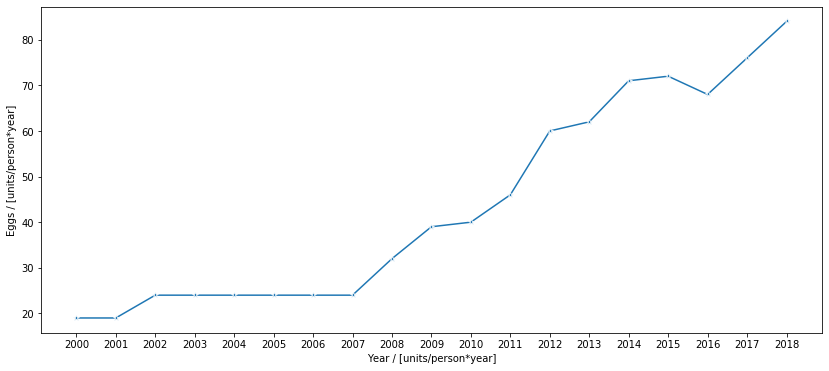

In [39]:
# Lineplot plot: Eggs vs Year
plt.figure(figsize=(14,6))
sns.lineplot(x='Year', y='Eggs', marker='*', data=df)
plt.xlabel('Year / [units/person*year]')
plt.ylabel('Eggs / [units/person*year]')
years=df['Year'].unique()
plt.xticks(years)

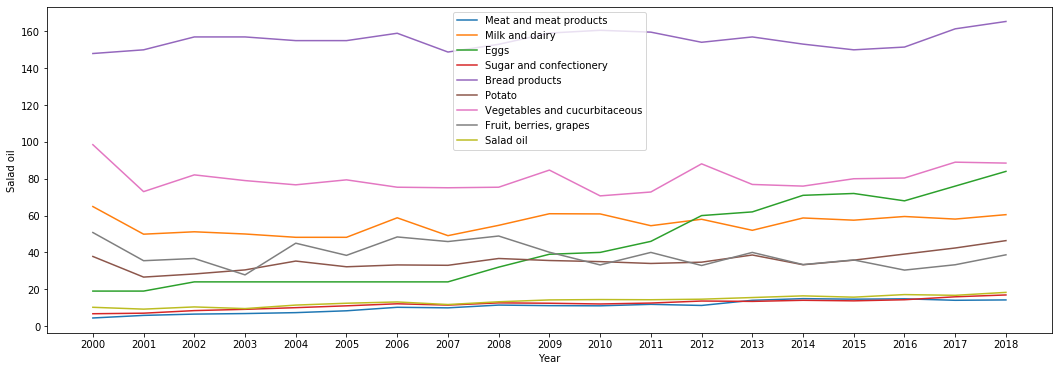

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
for col in df.drop(['Year','Arrived', 'Departed'], axis=1).columns:
    sns.lineplot(x='Year', y=col, data=df, ax=ax)
ax.legend(df.drop(['Year','Arrived', 'Departed'], axis=1).columns)
plt.xticks(years)
plt.show()

In [41]:
### Normalizing food consumption data
from sklearn import preprocessing

In [42]:
df_scaled = preprocessing.scale(df.drop(['Year','Arrived', 'Departed'], axis=1))

In [43]:
dff = pd.DataFrame(columns=df.drop(['Year','Arrived', 'Departed'], axis=1).columns, data=df_scaled)

In [44]:
dff['Year']=df['Year']

In [45]:
dff.head()

,Meat and meat products,Milk and dairy,Eggs,Sugar and confectionery,Bread products,Potato,Vegetables and cucurbitaceous,"Fruit, berries, grapes",Salad oil,Year
0,-1.921132,1.880550,-1.130788,-1.957961,-1.636329,0.584581,2.706540,1.897734,-1.294977,2000
1,-1.490254,-1.140627,-1.130788,-1.846021,-1.200280,-1.918415,-1.042227,-0.501880,-1.676443,2001
2,-1.274815,-0.878792,-0.902710,-1.323636,0.325889,-1.538496,0.295568,-0.313675,-1.218684,2002
3,-1.182484,-1.120486,-0.902710,-1.062444,0.325889,-1.046836,-0.160164,-1.709529,-1.562003,2003
4,-1.028599,-1.483027,-0.902710,-0.726625,-0.110160,0.025877,-0.498288,0.988077,-0.837218,2004


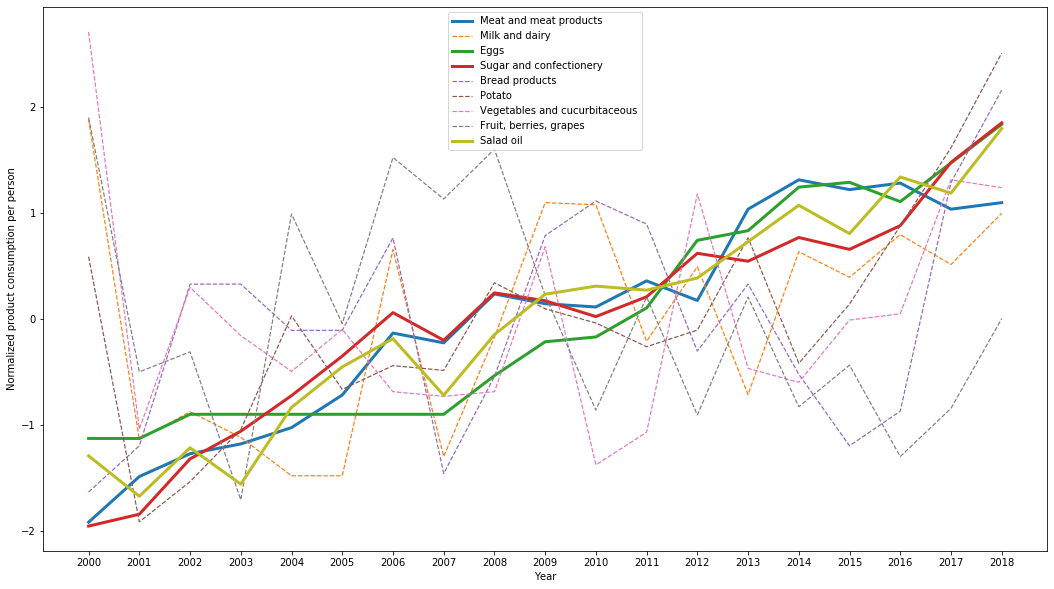

In [47]:
fig, ax = plt.subplots(figsize=(18,10))
for col in dff.drop(['Year'], axis=1).columns:
    if col in ['Meat and meat products', 'Eggs','Sugar and confectionery','Salad oil']:
        plt.plot(dff['Year'], dff[col], linewidth=3)
    else:
        plt.plot(dff['Year'], dff[col], linewidth=1.2, linestyle='dashed')
ax.legend(dff.drop(['Year'], axis=1).columns)
ax.set_xticks(years)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized product consumption per person')

plt.show()

([<matplotlib.axis.XTick at 0x248dbdb6248>,
 <a list of 19 Text xticklabel objects>)

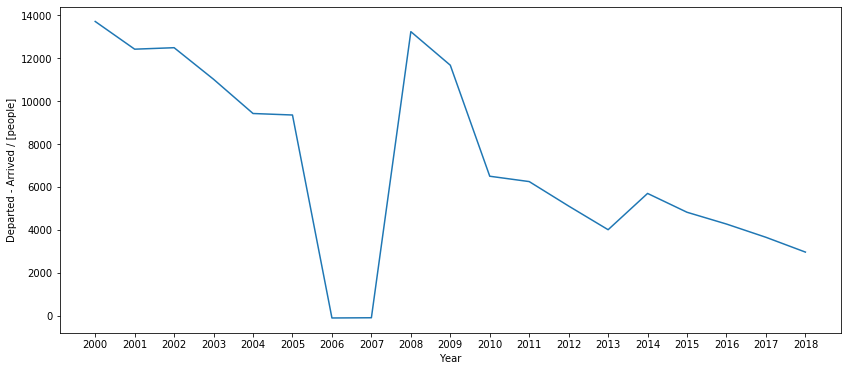

In [56]:
# Absolute migration deficit
plt.figure(figsize=(14,6))
plt.plot(df['Year'], df['Departed']-df['Arrived'])
plt.xlabel('Year')
plt.ylabel('Departed - Arrived / [people]')
plt.xticks(years)